In [1]:
import pandas as pd
import os

!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 17.0 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=f1a6b0234bbc15f22e2c647cdd99f9dec292675b3426b02d48b1845014b0a7bf
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The followin

In [30]:
from sklearn.datasets import load_wine
from scipy.stats import zscore
import numpy as np
import pandas as pd

wine = load_wine()

#print(wine['target'])

# create df1 and df2, df2 is the data after z-score
df1 = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df1.head()


df2 = df1.apply(zscore)
df2.head()



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [24]:
#use the demo code in the question, PCA doc needs check
from sklearn.decomposition import PCA
# Two components of PCA
pca1 = PCA(n_components=2)

# Fit on data
df3 = pca1.fit_transform(df1)
#display(df3)

# Access values and vectors
print(pca1.components_)
print(pca1.explained_variance_)
print(pca1.explained_variance_ratio_)
# Set up the componets as constant value 2
pca2 = PCA(n_components=2)

# PCA after z-score
df4 = pca2.fit_transform(df2)
print("data after z-score")
print(pca2.components_)
print(pca2.explained_variance_)
print(pca2.explained_variance_ratio_)
#display(df3)


[[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
   1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
   6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
   9.99822937e-01]
 [ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
   9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
   5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
  -1.77738095e-02]]
[99201.78951748   172.53526648]
[0.99809123 0.00173592]
data after z-score
[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]
[4.73243698 2.51108093]
[0.36198848 0.1920749 ]


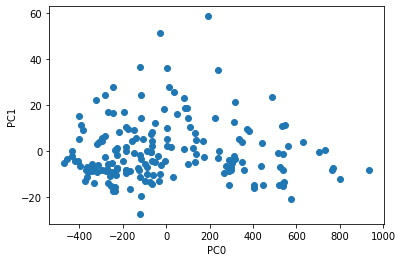

In [20]:
import matplotlib.pyplot as plot
# plot without z-score normalization
plot.scatter(df3[:,0], df3[:, 1])
plot.xlabel('PC0')
plot.ylabel('PC1')
plot.show()

178


,PC0,PC1,target,color
0,3.316751,-1.443463,0,g
1,2.209465,0.333393,0,g
2,2.516740,-1.031151,0,g
3,3.757066,-2.756372,0,g
4,1.008908,-0.869831,0,g
...,...,...,...,...
173,-3.370524,-2.216289,2,b
174,-2.601956,-1.757229,2,b
175,-2.677839,-2.760899,2,b
176,-2.387017,-2.297347,2,b


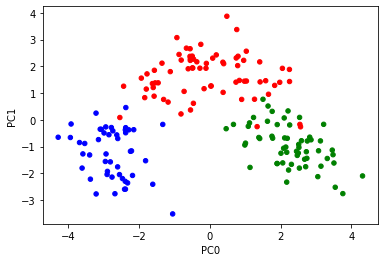

In [46]:
# plot after z-score normalization

# add the color dictionary for the plot color.
colordict = {0: "g", 1: "r", 2: "b" }
print(len(df4))
type(len(wine['target'].tolist()))
df5 = pd.DataFrame(df4, columns = ['PC0', 'PC1'])
# create df5 as dataframe and use concat to map it.
df5 = pd.concat([df5, pd.DataFrame(wine['target'], columns = ['target'])], axis=1)
df5['color'] = df5['target'].apply(lambda x : colordict[x])
display(df5)
#plot.scatter(df4['PC0'], df4['PC1'], df4['color'])
df5.plot.scatter(x = 'PC0', y = 'PC1', c = 'color')

#plot.xlabel('PC0')
#plot.ylabel('PC1')
#plot.show()